<a href="https://colab.research.google.com/github/indahmutiah/TugasBesar4/blob/main/Tgs14.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [136]:
import numpy as np
import matplotlib.pyplot as plt

In [137]:
def cos(frek, tipe, ht, hr, d):
  if frek in range(15, 1501):
    Ca = 69.55
    Cb = 26.16
  elif frek in range(1501, 2001):
    Ca = 46.3
    Cb = 33.9

  if tipe== 'urban' :
    Cm=0
  elif tipe=='suburban':
    Cm= -2*((np.log10((frek/28)**2))-5.4)
  elif tipe=='open' :
    Cm= -4.78*(np.log10(frek))+18.33*(np.log10(frek))-40.94
  else:
    Cm='tipe Salah'
  
  ahr = (1.1*np.log10(frek)-0.7)*hr-(1.56*np.log10(frek)-1.8)
  Pl = Ca + (Cb*np.log10(frek))-(13.838*np.log(ht))-ahr+((44.9-6.55*np.log10(ht))*np.log10(d))-Cm

  return Pl

In [138]:
def p_receiver(Ptx, Pl, Gtx, Grx ):
  Ptx= 10*np.log(Ptx*1000)
  Prx= 10**((Ptx - Pl + Gtx + Grx)/10)
  return Prx

In [170]:
 def snr(Prx, Bw):
    noise = -174 + (10*np.log10(Bw))
    no = 10**(noise/20)
    SNR = Prx / no
    return SNR

In [171]:
def Capacity(SNR, Bw):
  cap= Bw*np.log2(1+SNR)
  return cap

In [172]:
frek1=700 #MHz
frek2=900 #MHz
frek=1800 #MHz
loc1='urban'
loc2='suburban'
loc3='open'
Ptx= 30 #Watt
Gtx= 10 #db
Grx= 2 #db
Bw = 5000000 #Hz
tower=80 #m
user=1.5 #m
dmin=200 #m
dmax=700 #m
N=200 #titik


## DAYA TERIMA
Berdasarkan Lokasi

In [173]:
d=np.random.randint(dmin,dmax,N)
d=d[np.argsort(d)]
#Urban
PlUrban=cos(frek,loc1,tower,user,d)
PlUrban=PlUrban[np.argsort(d)]
PrxUrban= p_receiver(Ptx, PlUrban, Gtx, Grx)
#Open
PlOpen= cos (frek,loc3, tower,user, d)
PlOpen= PlOpen[np.argsort(d)]
PrxOpen = p_receiver(Ptx, PlOpen, Gtx, Grx)
#Suburban
PlSuburban= cos (frek,loc2, tower,user, d)
PlSuburban= PlSuburban[np.argsort(d)]
PrxSuburban = p_receiver(Ptx, PlSuburban, Gtx, Grx)

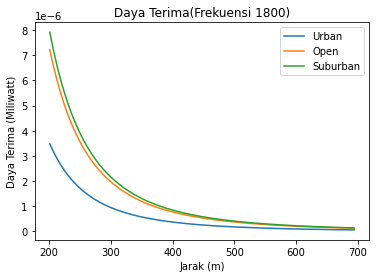

In [175]:
plt.figure("Frekuensi")
plt.plot(d,PrxUrban, label='Urban')
plt.plot(d,PrxOpen, label='Open')
plt.plot(d,PrxSuburban, label= 'Suburban')
plt.legend()
plt.title('Daya Terima(Frekuensi 1800)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (Miliwatt)')
plt.show()

## Daya Terima
Berdasarkan Frekuensi

In [176]:
#Frekuensi 700 Mhz
PlFrek1= cos(frek1,loc1,tower,user,d)
PlFrek1= PlFrek1[np.argsort(d)]
PrxFrek1= p_receiver(Ptx, PlFrek1, Gtx, Grx)
#Frekuensi 900 Mhz
PlFrek2= cos(frek2,loc1,tower,user,d)
PlFrek2= PlFrek2[np.argsort(d)]
PrxFrek2= p_receiver(Ptx, PlFrek2, Gtx, Grx)
#Frekuensi 1800 Mhz
PlFrek3= cos(frek,loc1, tower, user, d)
PlFrek3= PlFrek3[np.argsort(d)]
PrxFrek3= p_receiver(Ptx, PlFrek3, Gtx, Grx)

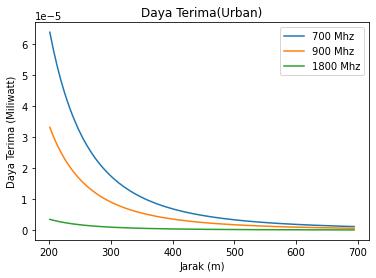

In [177]:
plt.figure()
plt.plot(d,PrxFrek1, label='700 Mhz')
plt.plot(d,PrxFrek2, label='900 Mhz')
plt.plot(d,PrxFrek3, label= '1800 Mhz')
plt.legend()
plt.title('Daya Terima(Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Daya Terima (Miliwatt)')
plt.show()

## SNR (SIGNAL TO NOISE RATIO)
BERDASARKAN LOKASI

In [178]:
SnrUrban = snr(PrxUrban, Bw)
SnrOpen = snr(PrxOpen, Bw)
SnrSuburban = snr(PrxSuburban, Bw)

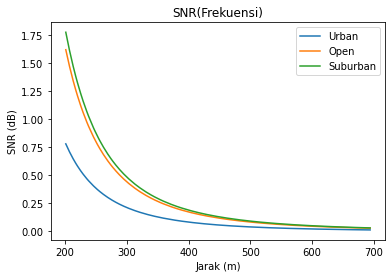

In [179]:
plt.figure('SNR Frekuensi')
plt.plot(d,SnrUrban, label='Urban')
plt.plot(d,SnrOpen, label='Open')
plt.plot(d,SnrSuburban, label= 'Suburban')
plt.legend()
plt.title('SNR(Frekuensi)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

#SNR (SIGNAL TO NOISE RATIO)
Berdasarkan Frekuensi

In [180]:
SnrFrek1= snr(PrxFrek1, Bw)
SnrFrek2= snr(PrxFrek2, Bw)
SnrFrek3= snr(PrxFrek3, Bw)

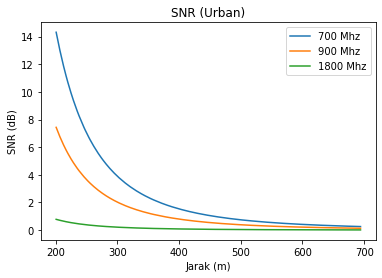

In [181]:
plt.figure("SNR Urban")
plt.plot(d,SnrFrek1, label='700 Mhz')
plt.plot(d,SnrFrek2, label='900 Mhz')
plt.plot(d,SnrFrek3, label= '1800 Mhz')
plt.legend()
plt.title('SNR (Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('SNR (dB)')
plt.show()

## KAPASITAS SELULER
GAMBAR 1

In [182]:
CapUrban =  Capacity(SnrUrban, Bw)
CapOpen = Capacity(SnrOpen, Bw)
CapSuburban = Capacity(SnrSuburban, Bw)

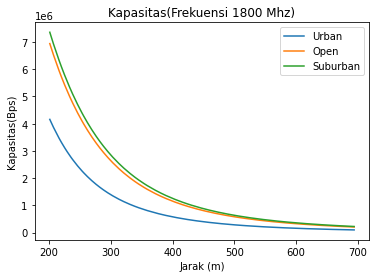

In [183]:
plt.figure('Kapasitas Frekuensi 1800 MZ')
plt.plot(d,CapUrban, label='Urban')
plt.plot(d,CapOpen, label='Open')
plt.plot(d,CapSuburban, label= 'Suburban')
plt.legend()
plt.title('Kapasitas(Frekuensi 1800 Mhz)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas(Bps)')
plt.show()

In [184]:
CapFrek1 = Capacity(SnrFrek1,Bw)
CapFrek2 = Capacity(SnrFrek2, Bw)
CapFrek3 = Capacity(SnrFrek3, Bw)

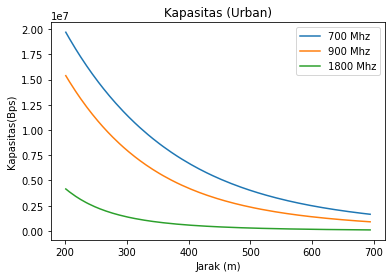

In [185]:
plt.figure('Kapasitas Urban')
plt.plot(d,CapFrek1, label='700 Mhz')
plt.plot(d,CapFrek2, label='900 Mhz')
plt.plot(d,CapFrek3, label= '1800 Mhz')
plt.legend()
plt.title('Kapasitas (Urban)')
plt.xlabel('Jarak (m)')
plt.ylabel('Kapasitas(Bps)')
plt.show()